# A Novel Armband Sensor System for Gesture Recognition
### Description of the data

Data source: https://archive.ics.uci.edu/dataset/481/emg+data+for+gestures


### For recording patterns, we used a MYO Thalmic bracelet worn on a user’s forearm, and a PC with a Bluetooth receiver. The bracelet is equipped with eight sensors equally spaced around the forearm that simultaneously acquire myographic signals. The signals are sent through a Bluetooth interface to a PC.
We present raw EMG data for 36 subjects while they performed series of static hand gestures.The subject performs two series, each of which consists of six (seven) basic gestures. Each gesture was performed for 3 seconds with a pause of 3 seconds between gestures.


Description of raw_data _*** file
Each file consist of 10 columns:
1) Time - time in ms;
2-9) Channel - eightEMG channels of MYO Thalmic bracelet;
10) Class  –thelabel of gestures:
0 - unmarked data,
1 - hand at rest,
2 - hand clenched in a fist,
3 - wrist flexion,
4 – wrist extension,
5 – radial deviations,
6 - ulnar deviations,
7 - extended palm (the gesture was not performed by all subjects).




Relevant Paper:
Lobov S., Krilova N., Kastalskiy I., Kazantsev V., Makarov V.A. Latent Factors Limiting the Performance of sEMG-Interfaces. Sensors. 2018;18(4):1122. doi: 10.3390/s18041122


Supported by the Ministry of Education and Science of the Russian Federation in the framework of megagrant allocation in accordance with the decree of the government of the Russian Federation №220, project № 14.Y26.31.0022

## We are going to test 2 approaches:
1. Subject Dependent Accuracy
2. Subject Independent Accuracy

# MACHINE LEARNING WORKFLOW:
### (1) Upload Data --> (2) Preprocess Data --> (3) Split Data --> (4) Fit the Data --> (5) Evaluate Model --> (6) Repeat

(7) Visualize & Explain Results

### STEP 1: UPLOAD DATA



In [14]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
cd '/content/drive/MyDrive/Guest Lectures/Data Science Society/EMG_data_for_gestures-master'

/content/drive/MyDrive/Guest Lectures/Data Science Society/EMG_data_for_gestures-master


In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

def load_subject(filepath, subject_num, trial):
  data_df = pd.read_csv(filepath + '/' + subject_num + '/' + trial, sep='\t')
  # Include only EMG data for the X
  data_df = data_df[data_df['class'] > 0]
  X1 = data_df.drop(['time', 'class'], axis=1)
  # Remove unlabeled data (class=0)
  # Gesture class
  Y1 = data_df['class']
  return X1, Y1, data_df

filepath = '/content/drive/MyDrive/Guest Lectures/Data Science Society/EMG_data_for_gestures-master'
subjects = os.listdir()

new_subjects = [subject for subject in subjects if 'README' not in subject]
subject1 = new_subjects[0]
subject8 = '08'

# Subject dependent sessions
trial = '1_raw_data_10-28_30.03.16.txt'
trial2 = '2_raw_data_10-29_30.03.16.txt'

# Subject independent sessions
subject_num1 = '1_raw_data_12-14_23.03.16.txt'
subject_num2 = '2_raw_data_12-16_23.03.16.txt'

# APPROACH 1: Subject Dependent (train on 1st session, test on the 2nd session)
X_train_dep, Y_train_dep, data_df_dep = load_subject(filepath, subject1, trial)
X_test_dep, Y_test_dep, data_df_dep = load_subject(filepath, subject1, trial2)

# APPROACH 2: Subject Independent (train on one subject, test on new subject)
X_train_ind, Y_train_ind, data_df_train_ind = load_subject(filepath, subject8, subject_num1)
X_test_ind, Y_test_ind, data_df_test_ind = load_subject(filepath, subject8, subject_num2)
print('X_train_dep.shape:', X_train_dep.shape, 'Y_train.shape:', Y_train_dep.shape)
print('X_test_dep.shape:', X_test_dep.shape, 'Y_test_dep.shape:', Y_test_dep.shape)
X_train_dep.describe()

X_train_dep.shape: (19130, 8) Y_train.shape: (19130,)
X_test_dep.shape: (20061, 8) Y_test_dep.shape: (20061,)


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
count,19130.000000,19130.000000,19130.000000,19130.000000,19130.000000,19130.000000,19130.000000,19130.000000
mean,-0.000008,-0.000009,-0.000008,-0.000006,-0.000011,-0.000011,-0.000011,-0.000010
std,0.000096,0.000085,0.000059,0.000132,0.000213,0.000170,0.000115,0.000124
min,-0.000710,-0.000930,-0.000520,-0.000740,-0.001150,-0.000910,-0.000750,-0.000820
25%,-0.000030,-0.000030,-0.000040,-0.000040,-0.000070,-0.000050,-0.000050,-0.000040
50%,-0.000010,-0.000010,-0.000010,0.000000,-0.000010,-0.000010,-0.000010,-0.000010
75%,0.000020,0.000020,0.000020,0.000030,0.000050,0.000030,0.000020,0.000020
max,0.000920,0.000640,0.000220,0.000750,0.001110,0.001040,0.000610,0.000880


### Check for class imbalance
* If imbalanced class -> Adjust number per classes
1. Unmarked Data
2. Rest
3. Wrist Flexion
4. Wrist Extension
5. Radial Deviation
6. Ulnar Deviations
7. Extended Palm (not performed by all subjects)

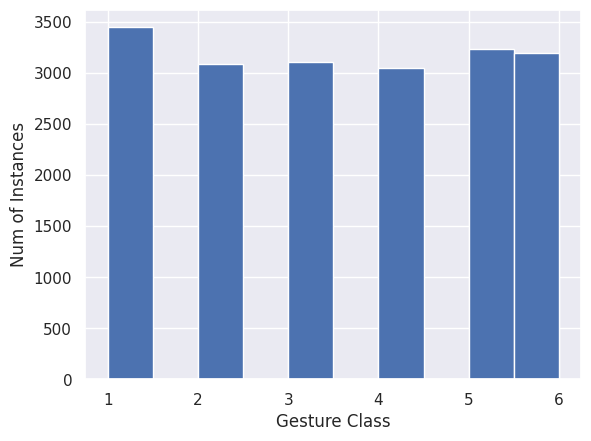

In [22]:
plt.hist(Y_train_dep)
plt.xlabel('Gesture Class')
plt.ylabel('Num of Instances')
plt.show()

In [5]:
X_train_dep

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
983,-0.00001,-0.00002,-0.00002,-0.00001,-0.00002,0.00000,0.00001,-0.00002
984,-0.00001,-0.00002,-0.00002,-0.00001,-0.00002,0.00000,0.00001,-0.00002
985,-0.00001,-0.00002,-0.00002,-0.00001,-0.00002,0.00000,0.00001,-0.00002
986,-0.00001,-0.00002,-0.00002,-0.00001,-0.00002,0.00000,0.00001,-0.00002
987,-0.00001,-0.00002,-0.00002,-0.00001,-0.00002,0.00000,0.00001,-0.00002
...,...,...,...,...,...,...,...,...
56195,0.00015,0.00004,0.00006,0.00007,0.00011,0.00065,0.00027,0.00045
56196,-0.00009,-0.00003,-0.00005,-0.00005,-0.00010,0.00037,-0.00001,-0.00019
56197,-0.00013,-0.00004,-0.00001,-0.00003,-0.00012,-0.00028,-0.00014,0.00009
56198,-0.00030,-0.00005,-0.00003,-0.00003,-0.00028,-0.00059,-0.00026,-0.00006


### Load **ALL** subjects (Last part after showing a tutorial for 1 subject)

In [8]:
data_df = pd.DataFrame(columns=['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8', 'class'])

Data_dir = filepath
files = list()
for dir in os.listdir(filepath):
  if dir !='README.txt':
    print('Uploading data for subject: ', dir)
    for file in os.listdir(os.path.join(filepath, dir)):
        file_df = pd.read_csv(os.path.join(filepath, dir, file), sep="\t")
        file_df.drop('time', axis=1, inplace=True)
        file_df.drop_duplicates(keep='last', subset=['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8', 'class'], inplace=True)
        print('Uploading trial: ', file)
        new_df = pd.concat([data_df, file_df],axis=0)
        data_df = new_df

Uploading data for subject:  05
Uploading trial:  1_raw_data_10-28_30.03.16.txt
Uploading trial:  2_raw_data_10-29_30.03.16.txt
Uploading data for subject:  07
Uploading trial:  2_raw_data_18-50_22.03.16.txt
Uploading trial:  1_raw_data_18-48_22.03.16.txt
Uploading data for subject:  02
Uploading trial:  1_raw_data_14-19_22.03.16.txt
Uploading trial:  2_raw_data_14-21_22.03.16.txt
Uploading data for subject:  06
Uploading trial:  2_raw_data_10-40_11.04.16.txt
Uploading trial:  1_raw_data_10-38_11.04.16.txt
Uploading data for subject:  04
Uploading trial:  1_raw_data_18-02_24.04.16.txt
Uploading trial:  2_raw_data_18-03_24.04.16.txt
Uploading data for subject:  01
Uploading trial:  1_raw_data_13-12_22.03.16.txt
Uploading trial:  2_raw_data_13-13_22.03.16.txt
Uploading data for subject:  08
Uploading trial:  1_raw_data_12-14_23.03.16.txt
Uploading trial:  2_raw_data_12-16_23.03.16.txt
Uploading data for subject:  03
Uploading trial:  1_raw_data_09-32_11.04.16.txt
Uploading trial:  2_raw_

In [9]:
data_df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
3,-0.00001,-0.00002,0.00001,0.00000,0.00000,-0.00002,0.00001,-0.00001,0
5,-0.00001,0.00001,0.00000,-0.00002,-0.00001,0.00001,0.00000,-0.00001,0
17,-0.00002,0.00000,-0.00002,-0.00001,-0.00002,0.00001,0.00001,0.00000,0
19,-0.00001,-0.00001,-0.00001,-0.00002,-0.00001,-0.00002,0.00000,-0.00001,0
41,0.00000,0.00000,0.00001,0.00002,0.00000,-0.00002,-0.00001,-0.00001,0


### We removed the unmarked data where Class=0.
* QUESTIONS:
1. What Machine Learning problem is this?
 (Multi-class classification)

  a.) Regression

  b.) Classification


2. We checked for class imbalance. What should you do if there is a class imbalance?

  a.) Remove samples from the majority classes causing the imbalance
  
  b.) Select an evaluation metric that can handle class imbalance, such as F1 score, Preceision, and Recall



### STEP 2: PREPROCESS DATA
0. Fix class imbalance
1. Normalize features
2. Feature Selection (Examine and drop correlated features)
3. Feature Engineering Techniques (filtering the signal, RMS)

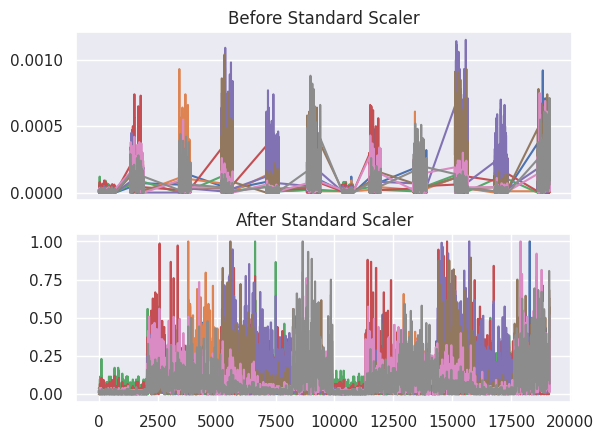

In [6]:
# Normalize entire data
from sklearn.preprocessing import MinMaxScaler
X_train = np.abs(X_train_dep)
X_scaled = MinMaxScaler().fit_transform(X_train)
plt.subplot(2,1,1)
plt.plot(X_train)
plt.title('Before Standard Scaler')
plt.xticks([])
plt.subplot(2,1,2)
plt.title('After Standard Scaler')
plt.plot(X_scaled)
plt.show()

### Split ALL the data

In [17]:
# Split the entire data
data_df = data_df[data_df['class'] > 0]
X = data_df.drop(['class'], axis=1)
Y = data_df['class']

<function matplotlib.pyplot.show(close=None, block=None)>

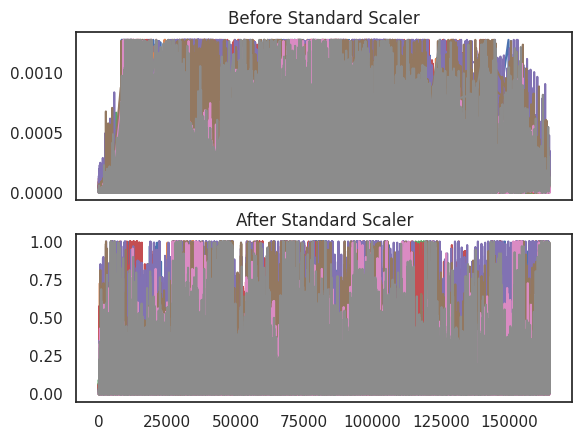

In [18]:
# Normalize entire data
from sklearn.preprocessing import MinMaxScaler
X = np.abs(X)
X_scaled = MinMaxScaler().fit_transform(X)
plt.subplot(2,1,1)
plt.plot(X)
plt.title('Before Standard Scaler')
plt.xticks([])
plt.subplot(2,1,2)
plt.title('After Standard Scaler')
plt.plot(X_scaled)
plt.show

In [19]:
train_sub = 26
train_len = int((train_sub/36)*len(X))
X_train = X_scaled[:train_len]
X_test = X_scaled[train_len:]
Y_train = Y[:train_len]
Y_test = Y[train_len:]
print(type(X_train), type(Y_train), type(X_test), type(Y_test))
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


((119001, 8), (119001,), (45770, 8), (45770,))

### Examine correlated features

Reasons to remove correlated features:
1. Computational cost
2. Interpretability
   - linear models assume is lack of perfect **multicollinearity** in the predictors.
3. Performance from redundant features (if the correlation = 1 or -1)


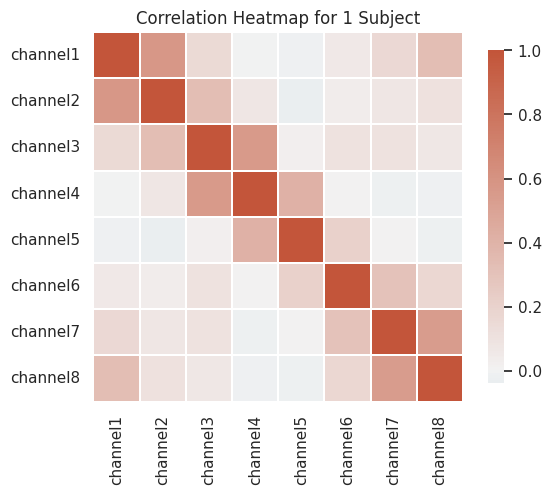

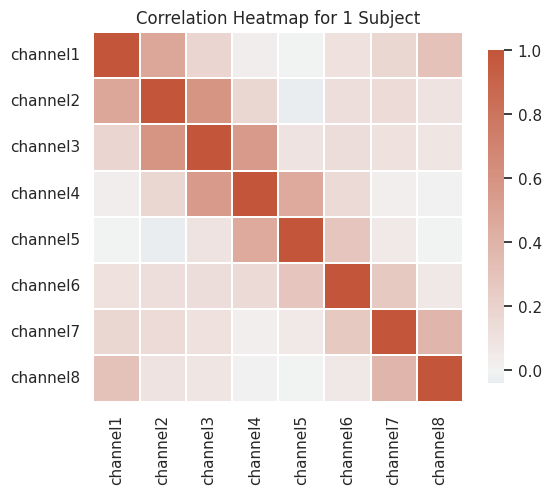

In [7]:
# Add training set to the list that you want to examine
train_set_list = [X_train_dep, X_test_dep]
for train_set in train_set_list:

  sns.set_theme(style="white")
  corr = pd.DataFrame(train_set).corr()
  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(230, 20, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, cmap=cmap, center=0,
              square=True, linewidths=.1, cbar_kws={"shrink": .9}, annot=False)
  plt.title('Correlation Heatmap for 1 Subject')
  plt.show()

### STEP 3: SPLIT DATA FOR ALL THE DATA
* Training and Testing

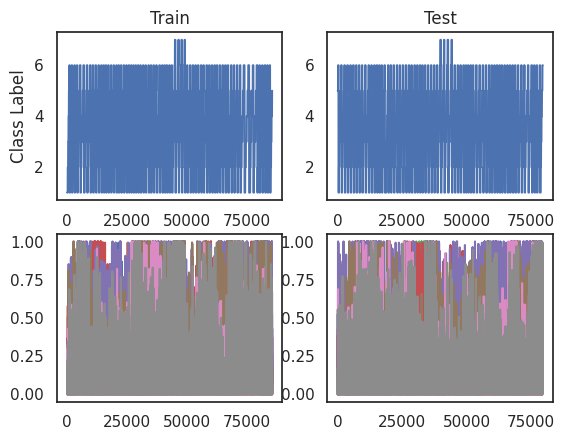

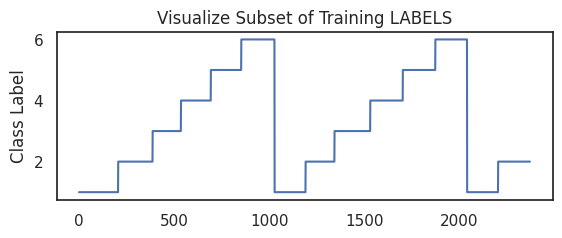

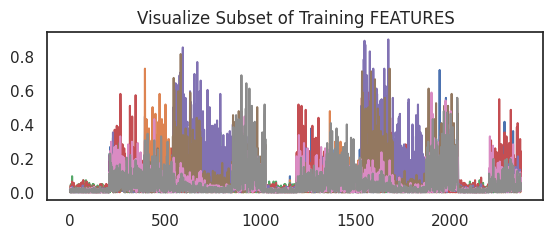

In [36]:
# 50% train and 50% test
train_size = 0.51805
train_len = int(train_size * (len(Y)))
Y_train = Y.iloc[:train_len]
Y_test = Y.iloc[train_len:]

plt.subplot(2,2,1)
plt.title('Train')
plt.ylabel('Class Label')
plt.plot(np.arange(len(Y_train)), Y_train)

plt.subplot(2,2,2)
plt.title('Test')
plt.plot(np.arange(len(Y_test)), Y_test)

X_train = X_scaled[:train_len]
X_test = X_scaled[train_len:]
plt.subplot(2,2,3)
plt.plot(X_train)
plt.subplot(2,2,4)
plt.plot(X_test)
plt.show()

plt.subplot(2,1,1)
plt.plot(np.arange(len(Y_train)//36), Y_train[:len(Y_train)//36])
plt.title('Visualize Subset of Training LABELS')
plt.ylabel('Class Label')
plt.show()

plt.subplot(2,1,2)
plt.plot(X_train[:len(X_train)//36])
plt.title('Visualize Subset of Training FEATURES')
plt.show()

### STEP 4: FIT THE DATA
* Logistic Regression
* Decision Tree
* Random Forest
  - Ensemble of Decision Trees
  - Uses Bootstrap Aggragation (Bagging) method
  - Reduces sensitivity to the data
  - Random featrure selection during majority voting reduces the correlation between the trees



In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Finds best split by maximizing entropy gain, the final leaf node is a class decision
from sklearn.ensemble import RandomForestClassifier
# SUBJECT DEPENDENT ----------------------
# Fit the data to the model
lr_dep  = LogisticRegression(random_state=42).fit(X_train_dep, Y_train_dep)
dt_dep = DecisionTreeClassifier(random_state=42).fit(X_train_dep, Y_train_dep)
rf_dep = RandomForestClassifier(random_state=42).fit(X_train_dep, Y_train_dep)

# predict train data
lr_pred_train_dep = lr_dep.predict(X_train_dep)
dt_pred_train_dep = dt_dep.predict(X_train_dep)
rf_pred_train_dep = rf_dep.predict(X_train_dep)

# predict test data
lr_pred_test_dep = lr_dep.predict(X_test_dep)
dt_pred_test_dep = dt_dep.predict(X_test_dep)
rf_pred_test_dep = rf_dep.predict(X_test_dep)

# SUBJECT INDEPENDENT ----------------
# Fit the data to the model
lr_ind  = LogisticRegression(random_state=2).fit(X_train_ind, Y_train_ind)
dt_ind = DecisionTreeClassifier(random_state=2).fit(X_train_ind, Y_train_ind)
rf_ind = RandomForestClassifier(random_state=2).fit(X_train_ind, Y_train_ind)

# predict train data
lr_pred_train_ind = lr_ind.predict(X_train_ind)
dt_pred_train_ind = dt_ind.predict(X_train_ind)
rf_pred_train_ind = rf_ind.predict(X_train_ind)

# predict test data
lr_pred_test_ind = lr_ind.predict(X_test_ind)
dt_pred_test_ind = dt_ind.predict(X_test_ind)
rf_pred_test_ind = rf_ind.predict(X_test_ind)

### STEP 5: EVALUATE THE MODEL

In [24]:
from sklearn.metrics import classification_report, accuracy_score

# SUBJECT DEPENDENT----------------------
# Train Accuracy
lr_acc_train_dep = 100*accuracy_score(lr_pred_train_dep, Y_train_dep)
dt_acc_train_dep = 100*accuracy_score(dt_pred_train_dep, Y_train_dep)
rf_acc_train_dep = 100*accuracy_score(rf_pred_train_dep, Y_train_dep)

# Test Accuracy
lr_acc_test_dep = 100*accuracy_score(lr_pred_test_dep, Y_test_dep)
dt_acc_test_dep = 100*accuracy_score(dt_pred_test_dep, Y_test_dep)
rf_acc_test_dep = 100*accuracy_score(rf_pred_test_dep, Y_test_dep)
print('----SUBJECT DEPENDENT ----')
print('Baseline Models:')
print('TRAIN ACCURACY: \nLogistic Regression: %.2f \nDecision Tree: %.2f \nRandom Forest: %.2f' % (lr_acc_train_dep, dt_acc_train_dep, rf_acc_train_dep))
print('\nTEST ACCURACY: \nLogistic Regression: %.2f \nDecision Tree: %.2f \nRandom Forest: %.2f' % (lr_acc_test_dep, dt_acc_test_dep, rf_acc_test_dep))

# SUBJECT INDEPENDENT----------------
# Train Accuracy
lr_acc_train_ind = 100*accuracy_score(lr_pred_train_ind, Y_train_ind)
dt_acc_train_ind = 100*accuracy_score(dt_pred_train_ind, Y_train_ind)
rf_acc_train_ind = 100*accuracy_score(rf_pred_train_ind, Y_train_ind)

# Test Accuracy
lr_acc_test_ind = 100*accuracy_score(lr_pred_test_ind, Y_test_ind)
dt_acc_test_ind = 100*accuracy_score(dt_pred_test_ind, Y_test_ind)
rf_acc_test_ind = 100*accuracy_score(rf_pred_test_ind, Y_test_ind)


print('\n----SUBJECT INDEPENDENT ----')
print('Baseline Models:')
print('TRAIN ACCURACY: \nLogistic Regression: %.2f \nDecision Tree: %.2f \nRandom Forest: %.2f' % (lr_acc_train_ind, dt_acc_train_ind, rf_acc_train_ind))
print('\nTEST ACCURACY: \nLogistic Regression: %.2f \nDecision Tree: %.2f \nRandom Forest: %.2f' % (lr_acc_test_ind, dt_acc_test_ind, rf_acc_test_ind))


----SUBJECT DEPENDENT ----
Baseline Models:
TRAIN ACCURACY: 
Logistic Regression: 18.02 
Decision Tree: 100.00 
Random Forest: 100.00

TEST ACCURACY: 
Logistic Regression: 15.24 
Decision Tree: 61.17 
Random Forest: 74.45

----SUBJECT INDEPENDENT ----
Baseline Models:
TRAIN ACCURACY: 
Logistic Regression: 17.97 
Decision Tree: 100.00 
Random Forest: 100.00

TEST ACCURACY: 
Logistic Regression: 16.73 
Decision Tree: 55.25 
Random Forest: 67.13


### STEP 6: REPEAT
* Let's tune the model
* TPOT API: https://epistasislab.github.io/tpot/api/

### Visualize Results using Confusion Matrix

SUBJECT DEPENDENT


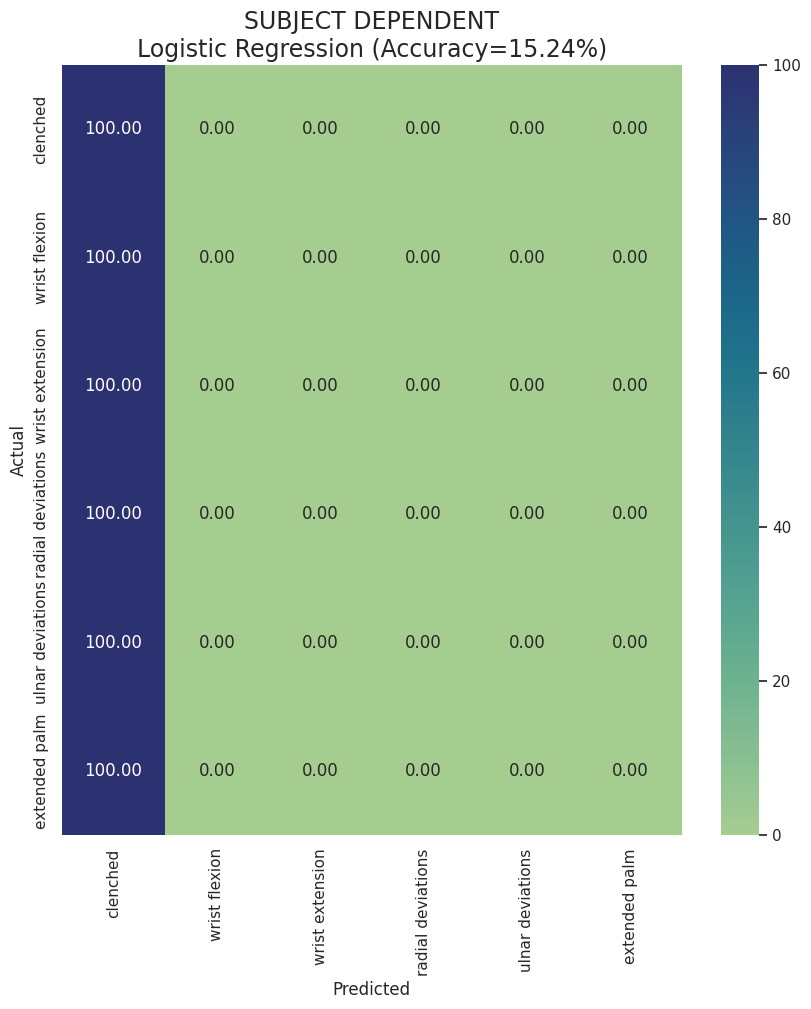

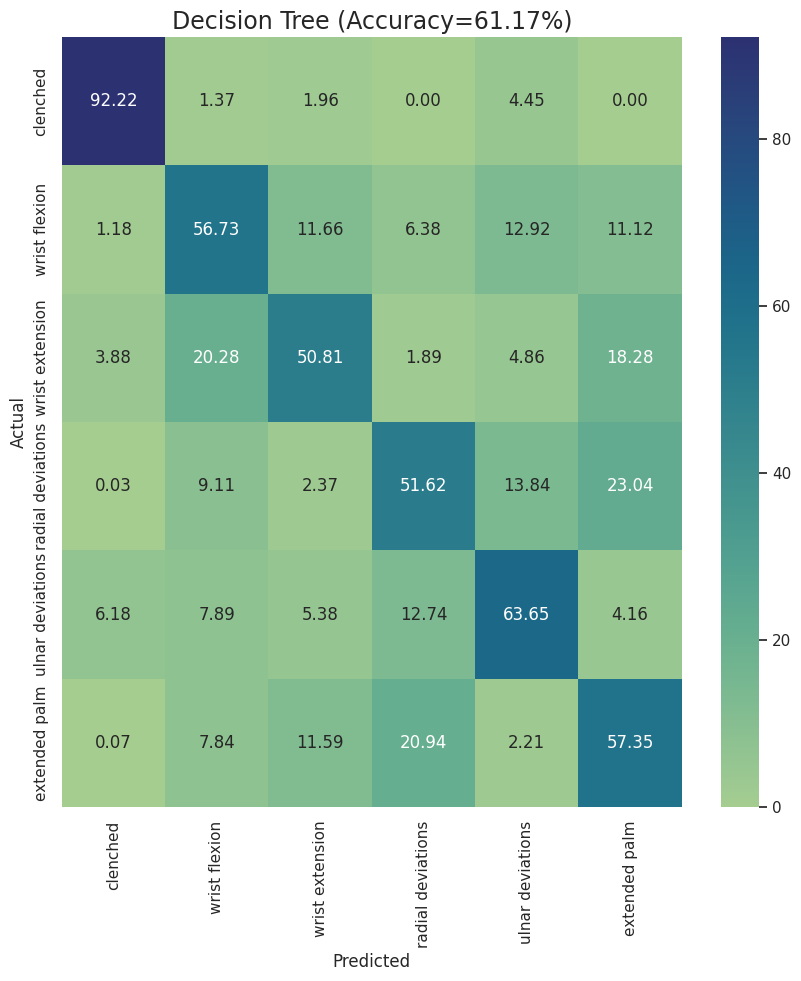

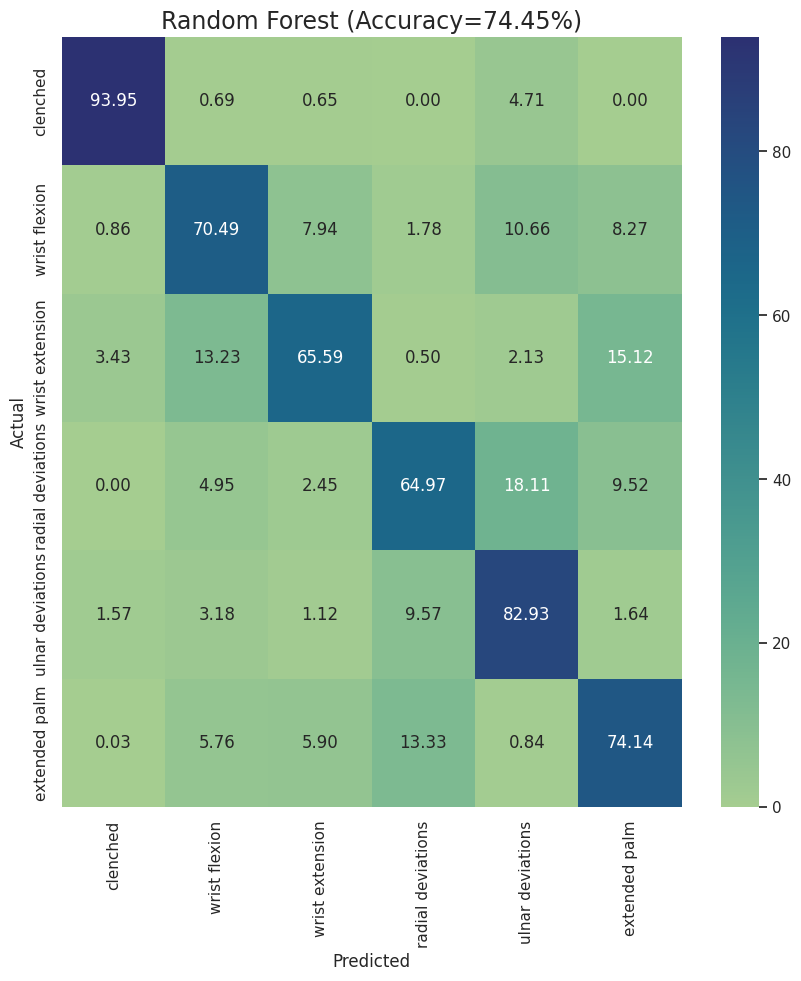

SUBJECT INDEPENDENT


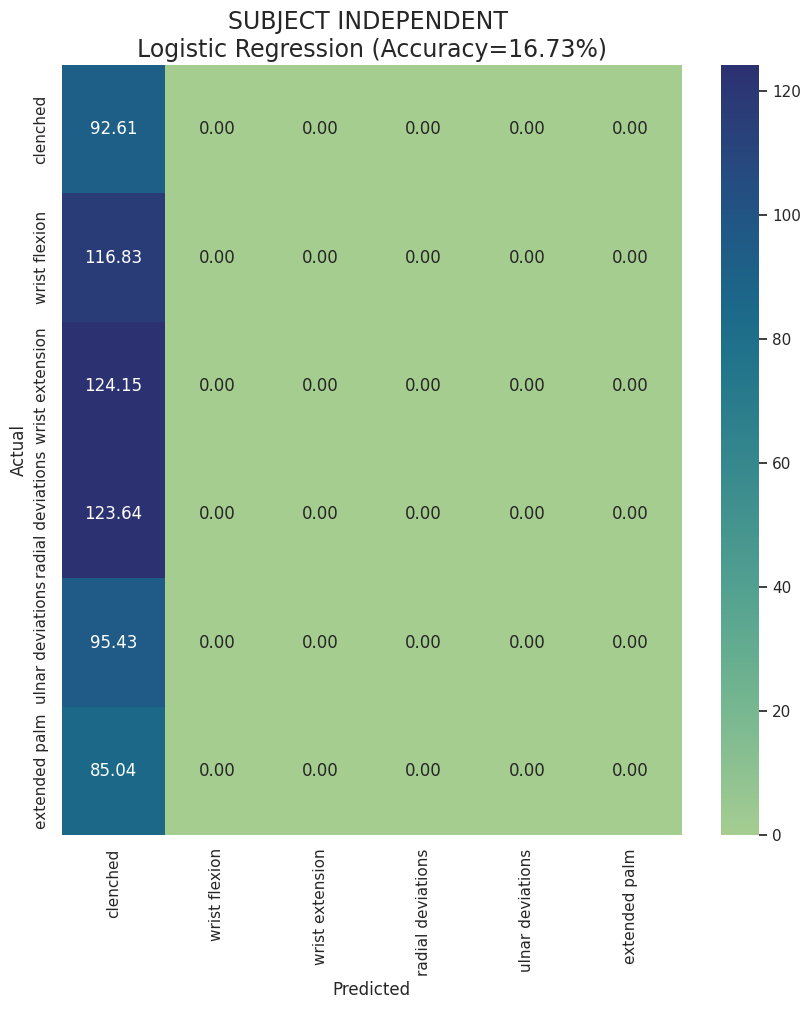

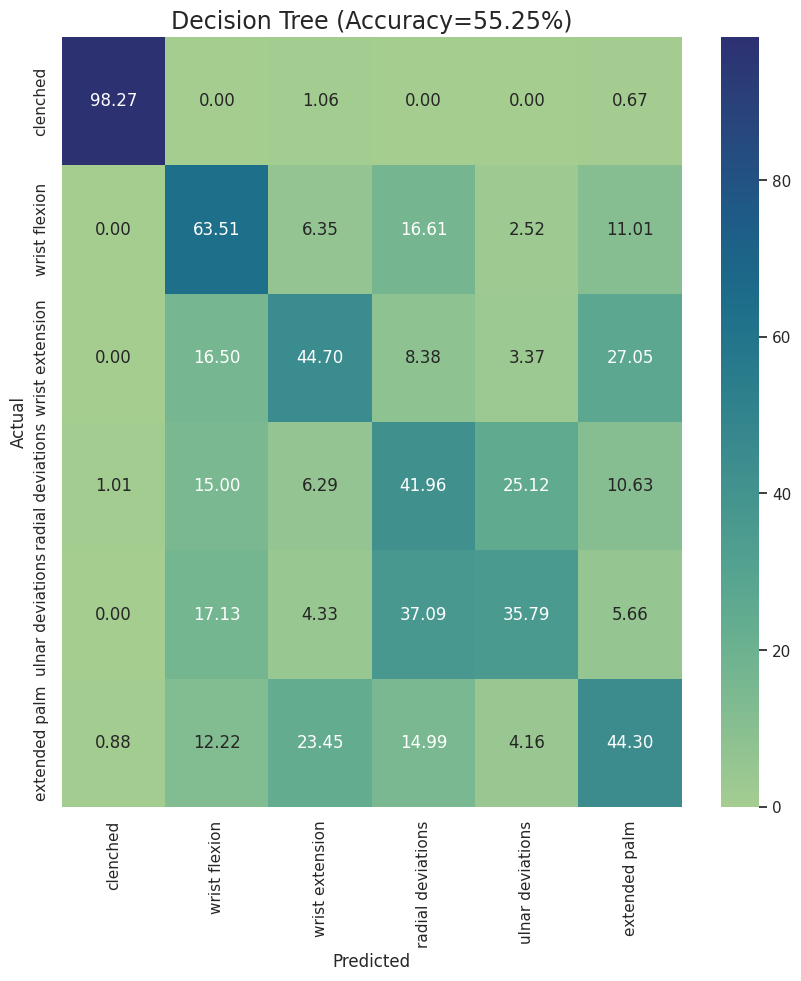

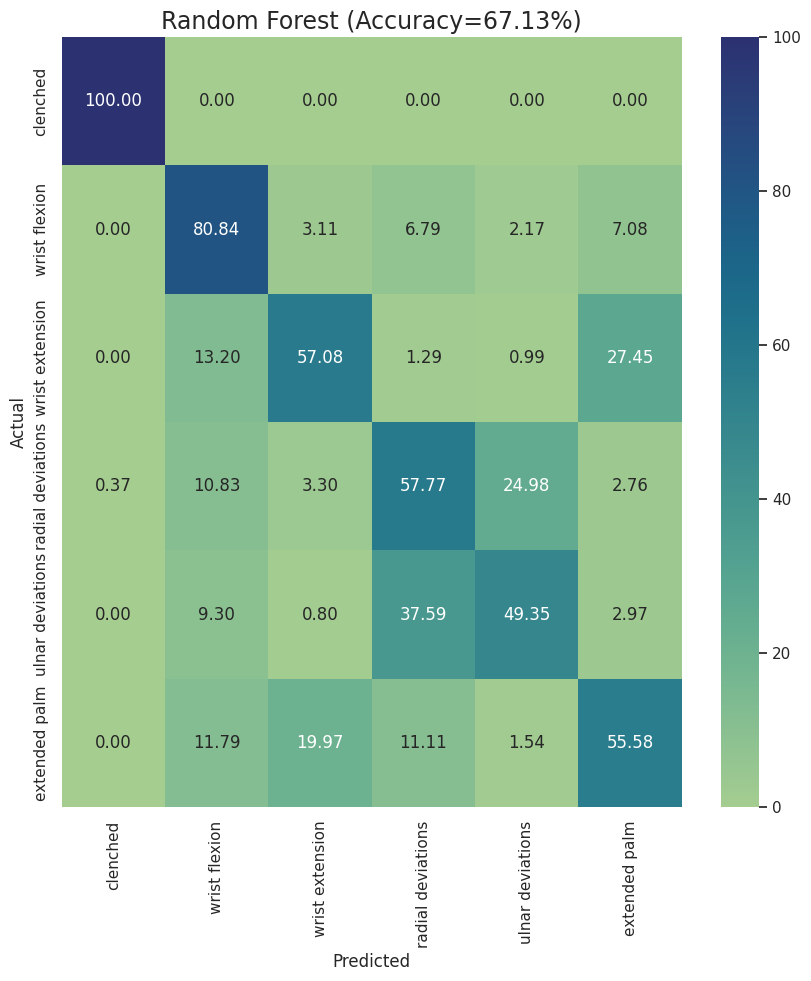




SUBJECT DEPENDENT INTER-DAY


In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

target_names = ['clenched', 'wrist flexion', 'wrist extension', 'radial deviations', 'ulnar deviations',
                'extended palm']

# SUBJECT DEPENDENT ----------------------
# compute the confusion matrix
cm_lr = confusion_matrix(Y_test_dep, lr_pred_test_dep)
cm_dt = confusion_matrix(Y_test_dep, dt_pred_test_dep)
cm_rf = confusion_matrix(Y_test_dep, rf_pred_test_dep)

# Normalise
print('SUBJECT DEPENDENT')
cmn_lr = 100*(cm_lr.astype('float') / cm_lr.sum(axis=1)[:, np.newaxis])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn_lr, annot=True, fmt='.2f', cmap='crest', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SUBJECT DEPENDENT\nLogistic Regression (Accuracy={:.2f}%)'.format(lr_acc_test_dep),fontsize=17)
plt.show()

cmn_dt = 100*(cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn_dt, annot=True, fmt='.2f', cmap='crest', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree (Accuracy={:.2f}%)'.format(dt_acc_test_dep),fontsize=17)
plt.show()

cmn_rf = 100*(cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn_rf, annot=True, fmt='.2f', cmap='crest', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest (Accuracy={:.2f}%)'.format(rf_acc_test_dep),fontsize=17)
plt.show()

# SUBJECT DEPENDENT INTER-DAY ----------------
cm_lr_ind = confusion_matrix(Y_test_ind, lr_pred_test_ind)
cm_dt_ind = confusion_matrix(Y_test_ind, dt_pred_test_ind)
cm_rf_ind = confusion_matrix(Y_test_ind, rf_pred_test_ind)

print('SUBJECT INDEPENDENT')
cmn_lr_ind = 100*(cm_lr.astype('float') / cm_lr_ind.sum(axis=1)[:, np.newaxis])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn_lr_ind, annot=True, fmt='.2f', cmap='crest', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SUBJECT INDEPENDENT \nLogistic Regression (Accuracy={:.2f}%)'.format(lr_acc_test_ind),fontsize=17)
plt.show()

cmn_dt_ind = 100*(cm_dt_ind.astype('float') / cm_dt_ind.sum(axis=1)[:, np.newaxis])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn_dt_ind, annot=True, fmt='.2f', cmap='crest', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree (Accuracy={:.2f}%)'.format(dt_acc_test_ind),fontsize=17)
plt.show()

cmn_rf2 = 100*(cm_rf_ind.astype('float') / cm_rf_ind.sum(axis=1)[:, np.newaxis])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn_rf2, annot=True, fmt='.2f', cmap='crest', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest (Accuracy={:.2f}%)'.format(rf_acc_test_ind),fontsize=17)
plt.show()
print('\n\n\nSUBJECT DEPENDENT INTER-DAY')

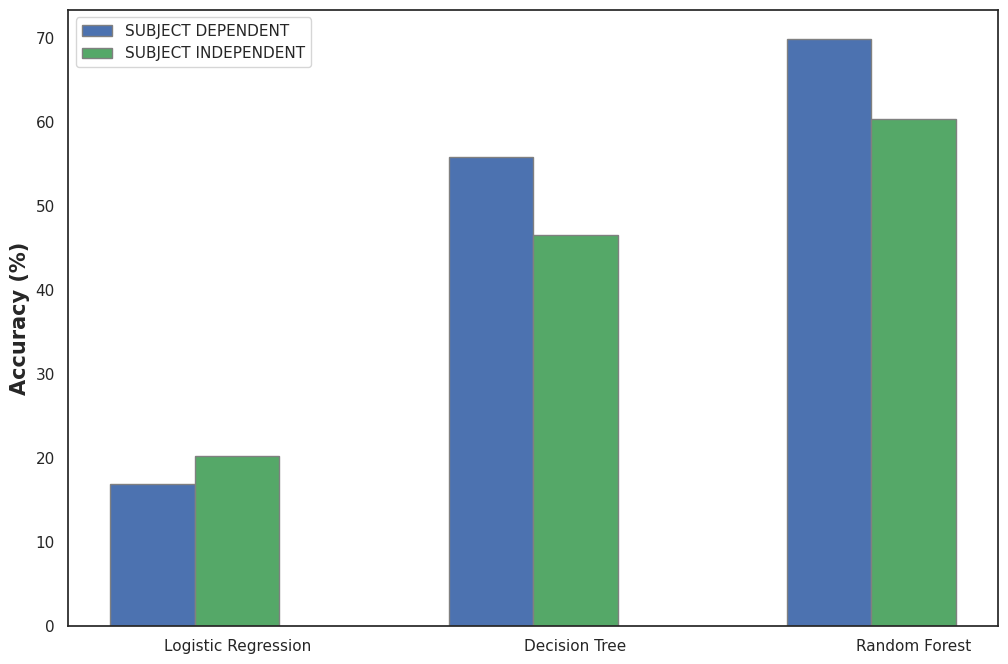

In [40]:
acc = pd.DataFrame([lr_acc_test_dep, dt_acc_test_dep, rf_acc_test_dep, lr_acc_test_ind, dt_acc_test_ind, rf_acc_test_ind])
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
acc_dep = [lr_acc_test_dep, dt_acc_test_dep, rf_acc_test_dep]
acc_ind = [lr_acc_test_ind, dt_acc_test_ind, rf_acc_test_ind]

# Set position of bar on X axis
br1 = np.arange(len(acc_dep))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, acc_dep, color ='b', width = barWidth,
        edgecolor ='grey', label ='SUBJECT DEPENDENT')

plt.bar(br2, acc_ind, color ='g', width = barWidth,
        edgecolor ='grey', label ='SUBJECT INDEPENDENT')

# Adding Xticks
plt.ylabel('Accuracy (%)', fontweight ='bold', fontsize = 15)

model_type = ['Logistic Regression', 'Decision Tree', 'Random Forest']
plt.xticks([r + barWidth for r in range(len(model_type))],
       model_type)

plt.legend()
plt.show()

### To Do:


1.  Get more data:
  * Train on many subjects and test on a novel subject (subject independent)

2. Optimize model:
  * Perform hyperparameter tuning and alter model architecture

3. Train a a different model
  * Perhaps a deep learning model (LSTM, CNN, or Auto-encoder)
  * TPOT
  * XGBoost, Explainable Boosting Machine (combines multiple weak learners to generate a strong one)

4. Try Feature engeineering
  - Feature selection
  -Feature reduction


### Feature Importances
* Good for seeing how we can eliminate certain features that do not contribute to the model
* Let's see which EMG input features were the most relevant

Text(0, 0.5, 'Mean Decrease Impurity')

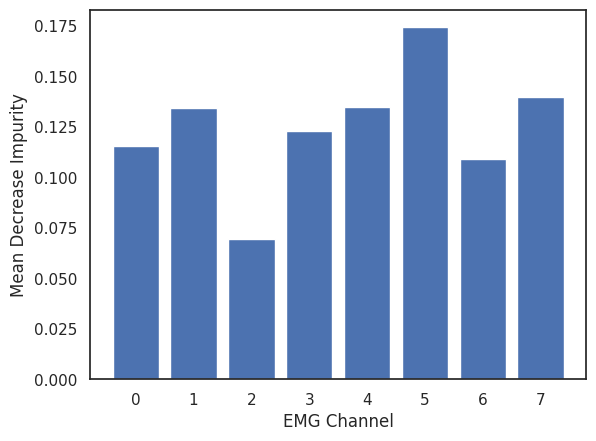

In [42]:
plt.bar(np.arange(len(rf_dep.feature_importances_)), rf_dep.feature_importances_)
plt.xlabel('EMG Channel')
plt.ylabel('Mean Decrease Impurity')

### Random Forest seems to be the best model... Can we improve it???
* Randomize search on hyper parameters.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print('\nLogistic Regression Params:\n', param_grid_lr, '\nDecision Tree Params:\n', param_grid_dt, '\nRandom Forest Params:\n', random_grid)


Logistic Regression Params:
 {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']} 
Decision Tree Params:
 {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]} 
Random Forest Params:
 {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

# Create a RandomizedSearchCV object
dt_random = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=param_grid_dt, n_iter=100, cv=2, random_state=42, n_jobs=-1)

# Create a RandomizedSearchCV object
log_reg_random = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=param_grid_lr, n_iter=100, cv=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to your data
rf_random.fit(X_train, Y_train)
log_reg_random.fit(X_train, Y_train)
dt_random.fit(X_train, Y_train)
rf_random, log_reg_random, dt_random

Fitting 2 folds for each of 100 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
8 fits failed out of a total of 16.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py",

RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42)

In [ ]:
# View best params
best_rf_params = rf_random.best_params_
best_dt_params = dt_random.best_params_
best_log_reg_params = log_reg_random.best_params_

rf_best = RandomForestClassifier(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    random_state=42  # Set the random_state for reproducibility if needed
)

rf_best2 = RandomForestClassifier(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    random_state=42  # Set the random_state for reproducibility if needed
)

best_lr = LogisticRegression(
    C=best_log_reg_params['C'],
    penalty=best_log_reg_params['penalty'],
    random_state=42  # Set the random_state for reproducibility if needed
)

best_dt = DecisionTreeClassifier(
    max_depth=best_dt_params['max_depth'],
    min_samples_split=best_dt_params['min_samples_split'],
    min_samples_leaf=best_dt_params['min_samples_leaf'],
    random_state=42  # Set the random_state for reproducibility if needed
)

# Fit the model to your training data
best_lr.fit(X_train, Y_train)
best_dt.fit(X_train, Y_train)
rf_best.fit(X_train, Y_train)
rf_best2.fit(X, Y)

RandomForestClassifier(max_depth=50, n_estimators=200, random_state=42)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = 100*accuracy_score(predictions, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
rf_accuracy = evaluate(rf, X_test, Y_test)
random_accuracy = evaluate(rf_best, X_test, Y_test)
base_dt_accuracy = evaluate(dt, X_test, Y_test)
best_dt_acc = evaluate(best_dt, X_test, Y_test)
base_lr_acc = evaluate(lr, X_test, Y_test)
best_lr_acc = evaluate(best_logistic_regression, X_test, Y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - rf_accuracy) / rf_accuracy))

Model Performance
Accuracy = 76.32%.
Model Performance
Accuracy = 77.93%.
Improvement of 2.12%.


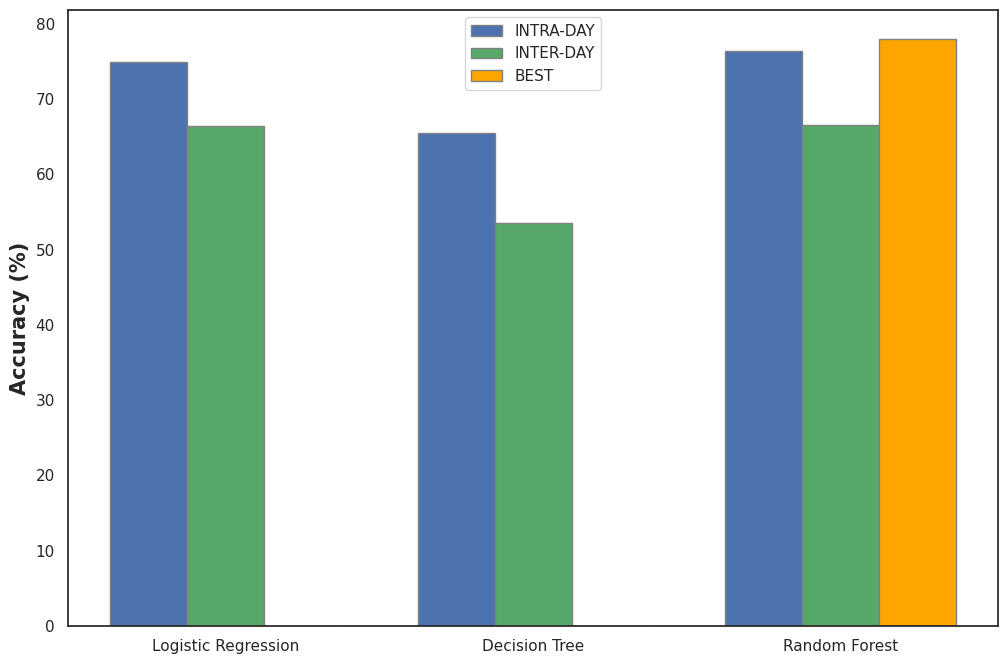

In [ ]:
# acc = pd.DataFrame([lr_acc, dt_acc, rf_acc, lr_acc2, dt_acc2, rf_acc2, random_accuracy])
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
acc = [lr_acc, dt_acc, rf_acc]
acc2 = [lr_acc2, dt_acc2, rf_acc2]
acc3 = [0, 0, random_accuracy]

# Set position of bar on X axis
br1 = np.arange(len(acc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, acc, color ='b', width = barWidth,
        edgecolor ='grey', label ='INTRA-DAY')
plt.bar(br2, acc2, color ='g', width = barWidth,
        edgecolor ='grey', label ='INTER-DAY')

plt.bar(br3, acc3, color='orange', width=barWidth,
        edgecolor='grey', label = 'BEST')

# Adding Xticks
plt.ylabel('Accuracy (%)', fontweight ='bold', fontsize = 15)

model_type = ['Logistic Regression', 'Decision Tree', 'Random Forest']
plt.xticks([r + barWidth for r in range(len(model_type))],
       model_type)

plt.legend()
plt.show()

### Improved Subject Dependent Intraday by 2% by Random search of best hyperparameters

## Visualize The Decision Trees for Random Forest

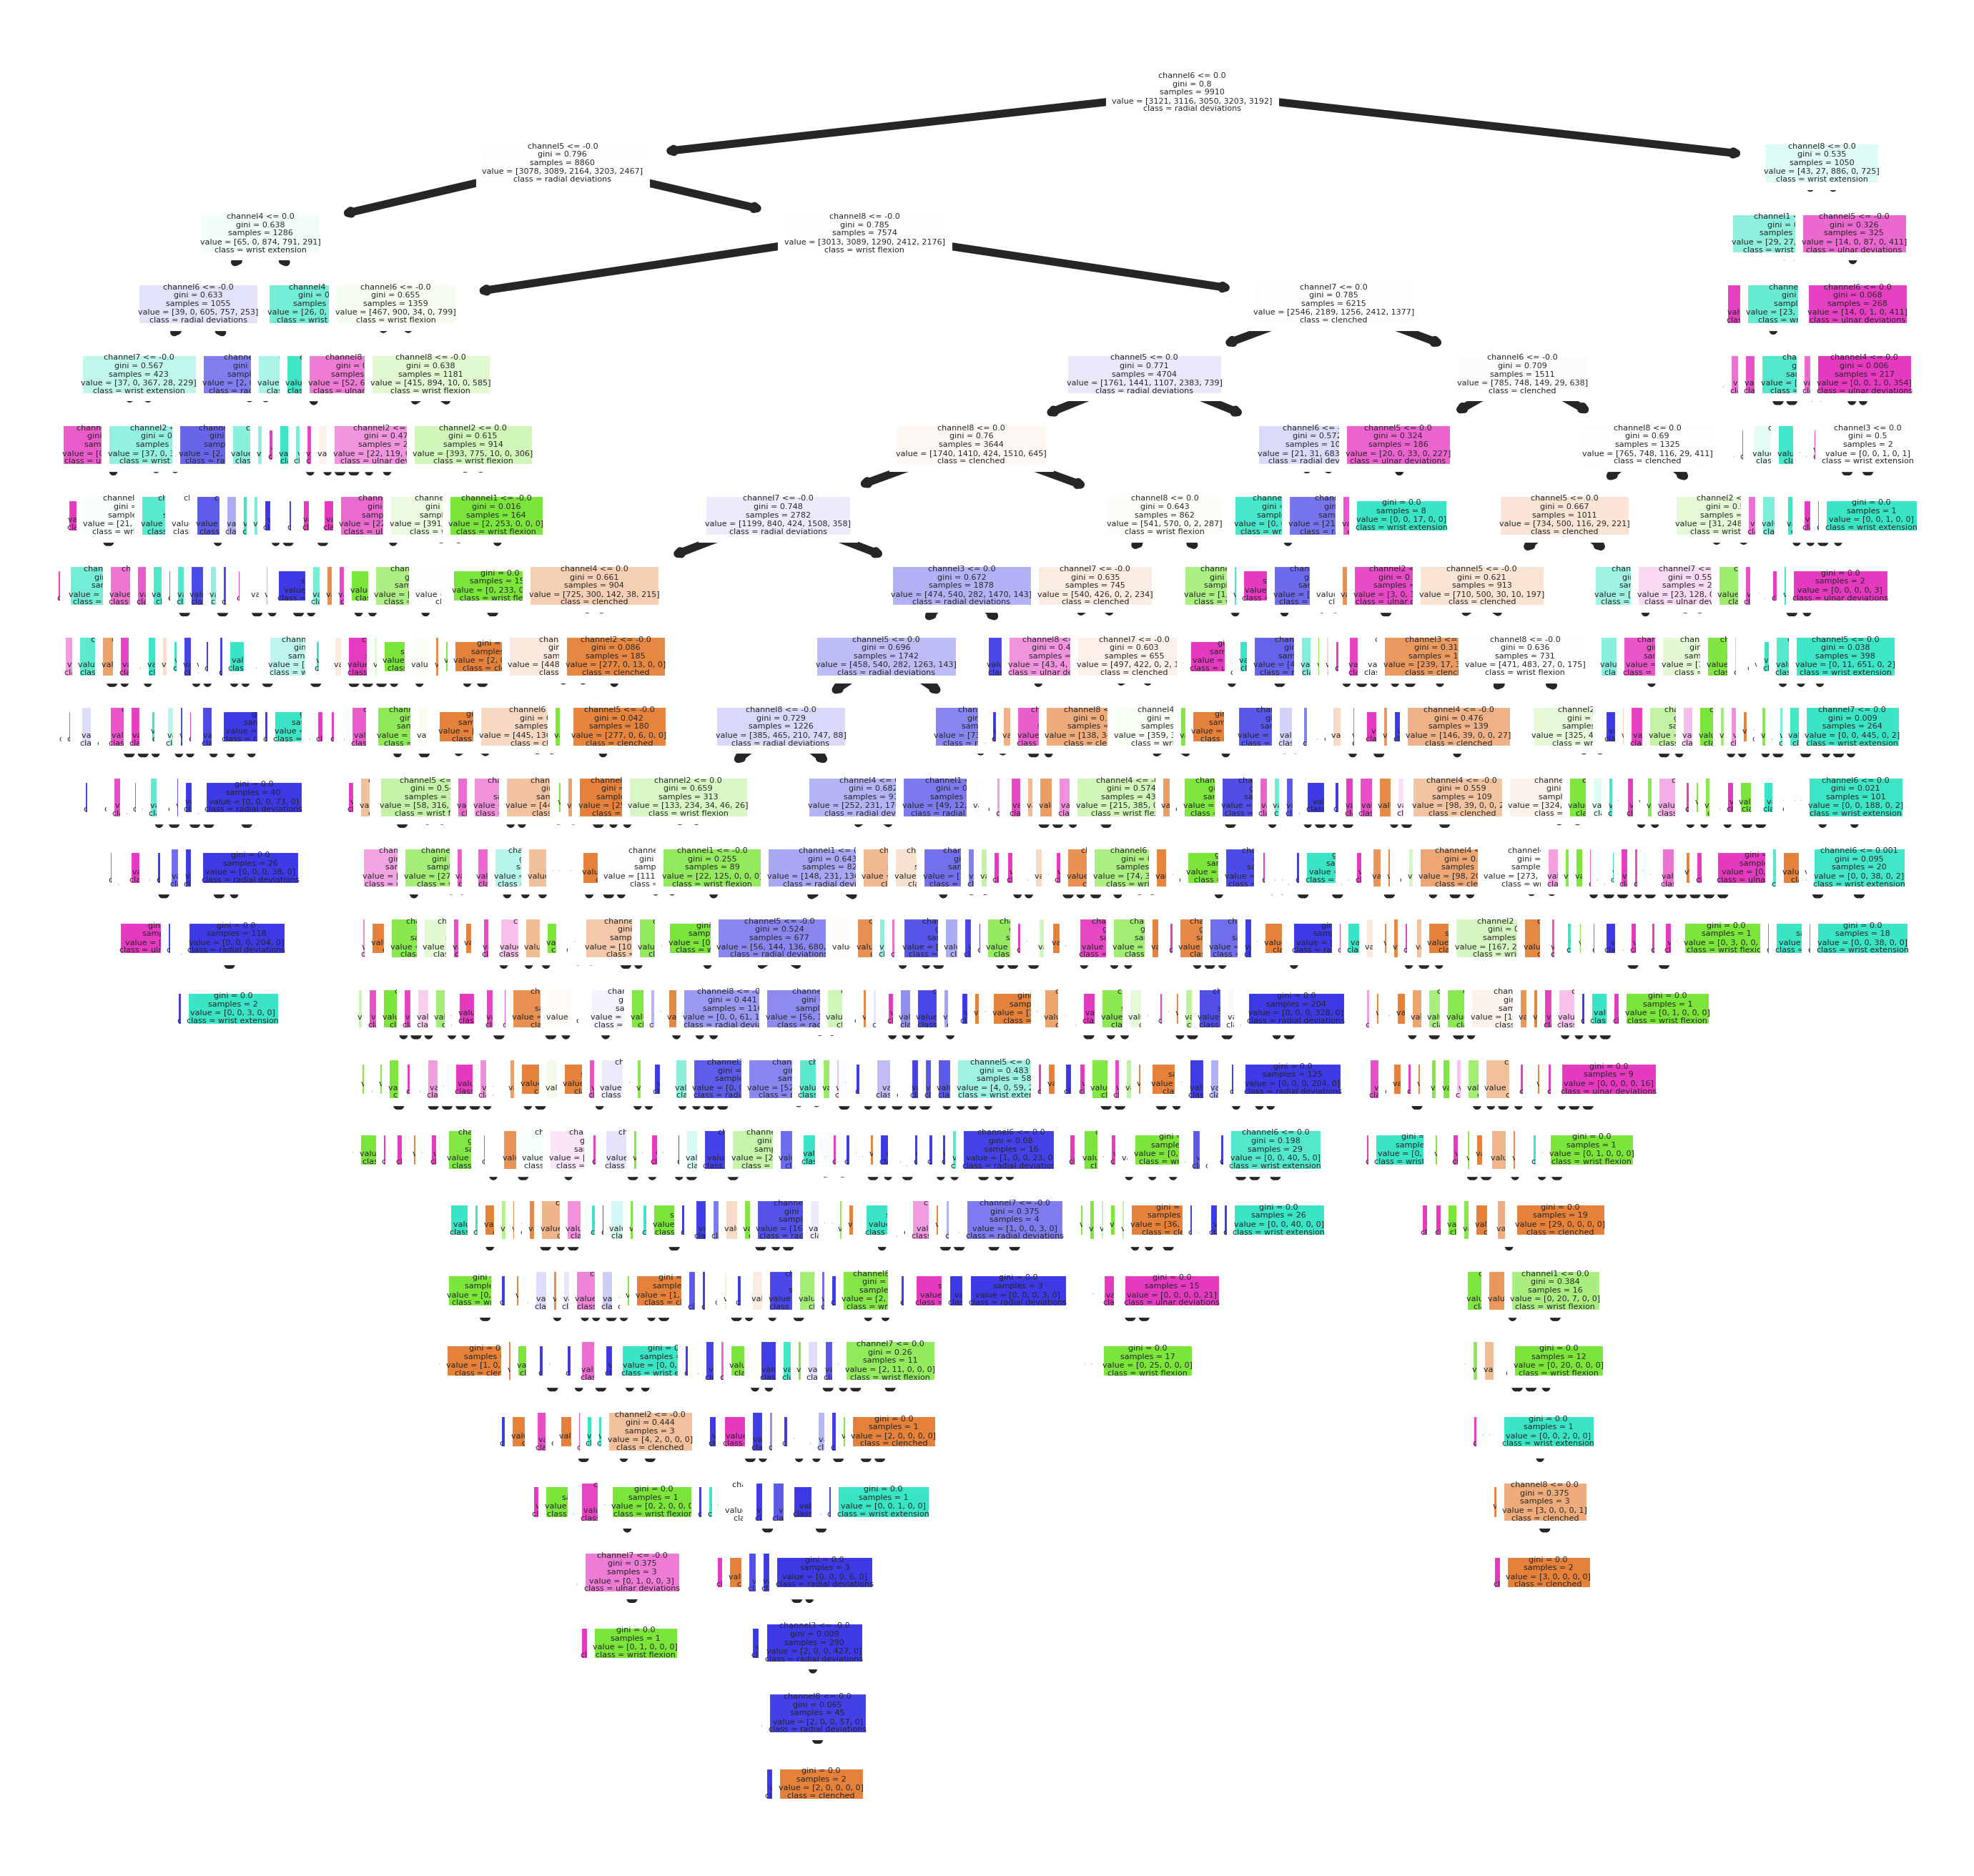

In [97]:
from sklearn.tree import export_graphviz
from sklearn import tree

fn=X_test_dep.columns
cn=target_names
# list(map(str,sorted(set(Y_test_dep))))

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_dep.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);

# fig.savefig('rf_individualtree.png')

In [61]:
data_df.columns[:-1], data_df.columns[-1]

(Index(['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6',
        'channel7', 'channel8'],
       dtype='object'),
 'class')

### Using Deep Learning Models from TensorFlow

### Use ALL subjects

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Assuming your features are stored in X and labels in y
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Train and evaluate your model on the current split
    # Your model training and evaluation code here...


In [ ]:
!pip install tpot
import tpot
# TPOT will evaluate population_size + generations × offspring_size pipelines in total.

tpot = tpot.TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, Y_train)
tpot.score(X_test, Y_test)
# export the best model
# tpot.export('tpot_model.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6529990528867825

Generation 2 - Current best internal CV score: 0.6529990528867825

Generation 3 - Current best internal CV score: 0.6628732783605475

Generation 4 - Current best internal CV score: 0.6628732783605475

Generation 5 - Current best internal CV score: 0.6628732783605475

Best pipeline: ExtraTreesClassifier(RBFSampler(input_matrix, gamma=0.8500000000000001), bootstrap=False, criterion=entropy, max_features=0.1, min_samples_leaf=6, min_samples_split=14, n_estimators=100)


0.6787002346020519

In [ ]:
tpot.fitted_pipeline_

Pipeline(steps=[('rbfsampler', RBFSampler(gamma=0.8500000000000001)),
                ('extratreesclassifier',
                 ExtraTreesClassifier(criterion='entropy', max_features=0.1,
                                      min_samples_leaf=6,
                                      min_samples_split=14))])

In [54]:
import pandas as pd
import numpy as np
import os
import re # Regular Expressions library
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Remove Rest Class
data_df = data_df[data_df['class'] != 0]

# Format Data: Split into attrubutes and class labels
X = data_df.iloc[1:,:-1]
y = data_df['class']
time = data_df.iloc[:, 0]

# Feature scaling using z-scale transformation (+- 1 stdev)
X = abs(X)
X_scaled = preprocessing.StandardScaler().fit_transform(X)
y = y.iloc[:-1]

In [44]:
int(0.8*len(X)), len(y), X.shape, y.shape

(131816, 164770, (164770, 8), (164770,))

In [49]:
# =================== TEST ALGORITHMS ===================
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix as cm
import seaborn as sns; sns.set()

# Split 80 percent training and 20 percent for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)

# PCA
pca = PCA(n_components = 5)
pca.fit(X_train)
print("PCA explained variance: ", pca.explained_variance_ratio_)

# ------ Test Random Forest ------------
# n_estimators parameter defines the number of trees in the random forces
max_depth=13
classifier_randomforest = RandomForestClassifier(n_estimators = 10, random_state = 0, max_depth=max_depth)
classifier_randomforest.fit(X_train, y_train)
randomforest_pred = classifier_randomforest.predict(X_test)

# ------ Test Random Forest ------------
rf_accuracy = round(accuracy_score(y_test, randomforest_pred),3)

# ACCURACY PERFORMANCE
print('Accuracy using Random Forest Classifier: ' + str(rf_accuracy))

PCA explained variance:  [0.30668314 0.17982844 0.14127302 0.09898921 0.08349655]


ValueError: ignored

In [46]:
y_train

14745    4
47947    6
36528    1
17981    4
40523    2
        ..
5815     2
26331    6
33539    1
24341    5
61945    6
Name: class, Length: 131816, dtype: object

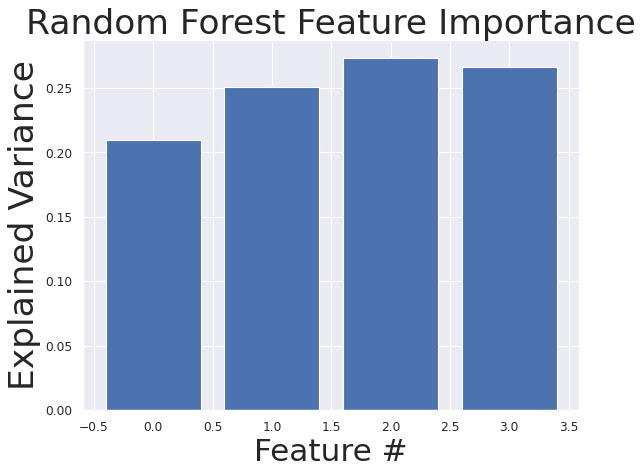

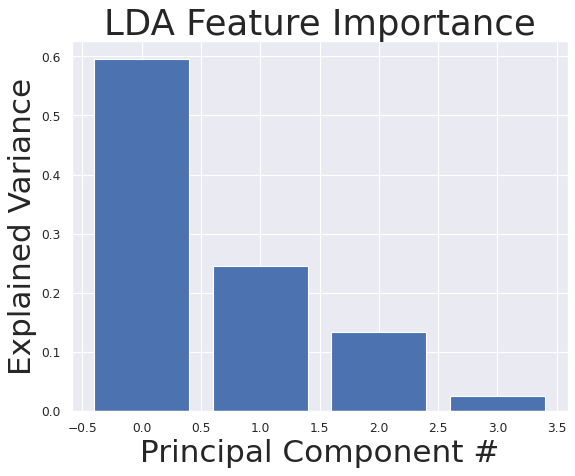

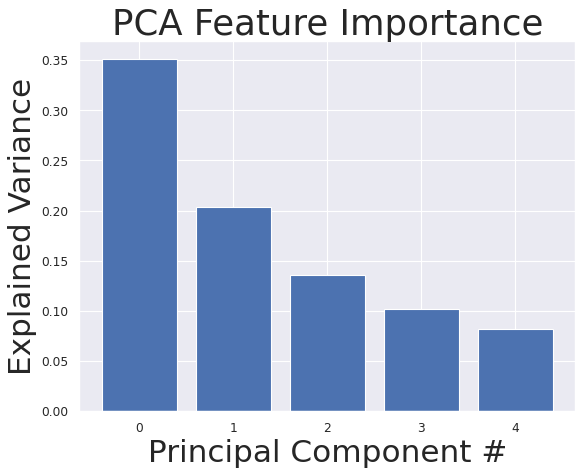

In [81]:
# =======Plot feature importance ========
from matplotlib import pyplot
from matplotlib.pyplot import figure
rf_importance = classifier_randomforest.feature_importances_
pca_importance = pca.explained_variance_ratio_

# === Random Forest Importance ======
figure(figsize=(8, 6), dpi=80)
plt.rc('font', size=22)
plt.title('Random Forest Feature Importance', fontsize = 31)
plt.xlabel('Feature #', fontsize=28)
plt.ylabel('Explained Variance', fontsize = 31)
pyplot.bar([x for x in range(len(rf_importance))], rf_importance)
pyplot.show()

# === LDA Importance ======
figure(figsize=(8, 6), dpi=80)
plt.rc('font', size=22)
plt.title('LDA Feature Importance', fontsize = 32)
plt.xlabel('Principal Component #', fontsize=28)
plt.ylabel('Explained Variance', fontsize = 28)
pyplot.bar([x for x in range(len(lda_importance))], lda_importance)
pyplot.show()
figure(figsize=(8, 6), dpi=80)

# ===== PCA Importance =====
plt.rc('font', size=22)
plt.title('PCA Feature Importance', fontsize = 32)
plt.xlabel('Principal Component #', fontsize=28)
plt.ylabel('Explained Variance', fontsize = 28)
pyplot.bar([x for x in range(len(pca_importance))], pca_importance)
pyplot.show()

In [87]:
# =================== EVALUATE ALGORITHMS ===================
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

classes = ['Clenched', 'Wrist Flexion', 'Wrist Extension', 'Radial Deviation', 'Ulnar Deviation', 'Extended Palm']
randomforest_report = classification_report(y_test, randomforest_pred, output_dict=True, digits=3, target_names = classes)
randomforest_report_df = pd.DataFrame(randomforest_report).transpose()

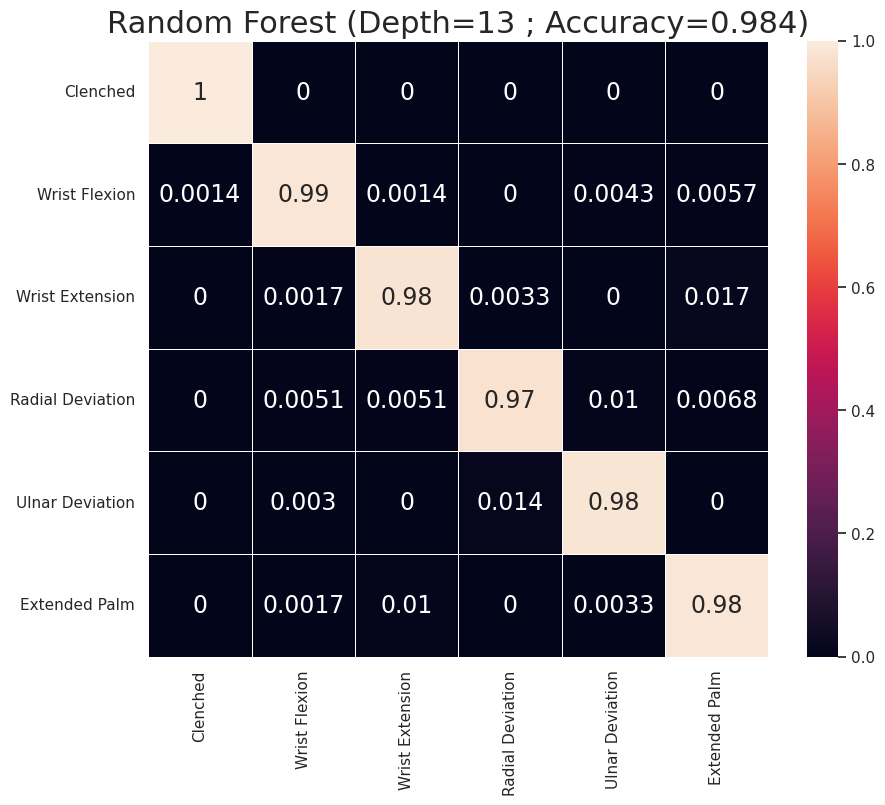

<Figure size 640x480 with 0 Axes>

In [90]:
#  =================== PLOT CONFUSION MATRICES ===================
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = ['Clenched', 'Wrist Flexion', 'Wrist Extension', 'Radial Deviation', 'Ulnar Deviation', 'Extended Palm']

# Random Forest - Confusion Matrix ---------------
fig, ax = plt.subplots(figsize=(10,8))
cm_rf = confusion_matrix(y_test, randomforest_pred)
np.set_printoptions(precision=2)
cm_norm_rf = cm_rf.astype('float')/cm_rf.sum(axis=1)[:,np.newaxis]
plt.figure()

x_axis_labels = classes
y_axis_labels = classes
heatmap = sns.heatmap(cm_norm_rf, annot=True, annot_kws={"size":17},linewidths=.5, ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set_title('Random Forest (Depth=' + str(max_depth) + ' ; Accuracy=' +str(rf_accuracy) + ')', fontsize = 22)
plt.show()